# DAV 6150 Project 3 - Gradient Descent + Gradient Boosting
Ke Chen, Brian Livian, Alejandra Zapata

## 1. Introduction
The dataset regarding diamonds will be used to construct 5 machine leaning models in this project. The model algorithms include  Decision Tree, Random Forest, Gradient Boosting Classifier, Stochastic Gradient Descent Classifier as well as XG Boost Classifier, which are all based on gradient descent concepts. The purpose of the model will be for predicting the **cut** values of the given observations. After comparing the 5 models, the best model will be selected.

The steps will be summarized as:

- 1. Import the data set and apply exploratory data analysis (EDA).
- 2. Based on the EDA result, perform cleaning and data scaling if needed.
- 3. Split the dataset in to training and hold out testing sets.
- 4. Apply 5 models based on gradient descent concepts to the training data set.
- 5. By comparing the metrices of each model, select the best model on the hold out testing set and check the performance.

First things first, the data set will be imported as a pandas data frame.

In [1]:
# import pandas libraries for dataframe loading
import pandas as pd
# read data into dataframe
df=pd.read_csv(r'https://raw.githubusercontent.com/chenkecoco1/DAV-6150/91584cde3ec00580d0c64abcfe68f747e9b12587/Project3_Data.csv')
# check loading
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 2. Exploratory Data Analysis
According to the introduction (https://ggplot2.tidyverse.org/reference/diamonds.html) of the data set, the attribute can be present as below:

* carat: weight of the diamond (0.2--5.01)
* cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal). This variable will be used as the response variable.
* color: diamond colour, from D (best) to J (worst)
* clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* table: width of top of diamond relative to widest point (43--95)
* price: price in US dollars (326--18,823)
* x: length in mm (0--10.74)
* y: width in mm (0--58.9)
* z: depth in mm (0--31.8)

The cut, color and clarity are categorical variables. Since they are degrees from worst to best, they are ordinal. The other variables are numeric.

In [2]:
# get the basic data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [3]:
# checking missing values in each column
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There are no missing values in the data set. 

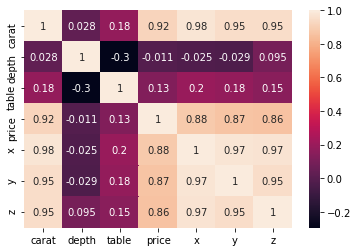

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
# Heatmap of correlation
sns.heatmap(df.corr(), annot=True)
plt.show()

Based off the heatmap below, price is positively correlated to all numeric attributes except for depth and table. Of course, x y and z are each correlated to each other (dimensions of the length width and height). Carat is strongly correlated to length width and height as well (makes sense intuitively). To facilitate plotting the numeric and categorical variables separately, we can divide the data set into two groups. 

In [7]:
# separate numeric and categorical
df_num=df[['carat','depth','table','price','x','y','z']]
df_cat=df[['cut','color','clarity']]

#### Numeric Variables

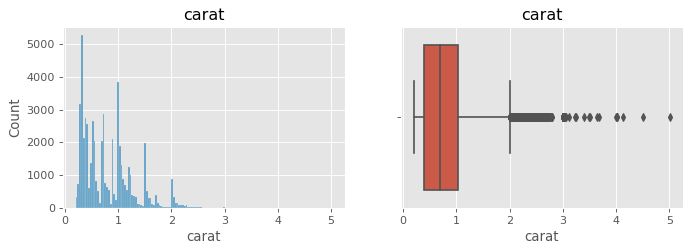

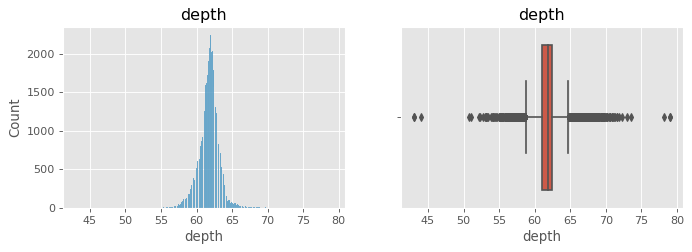

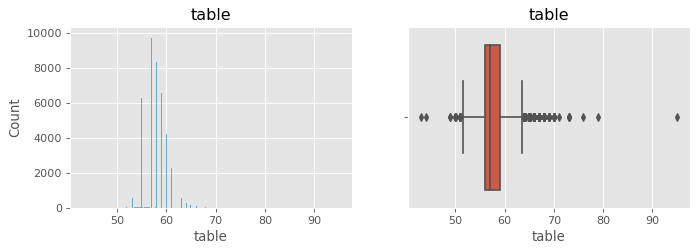

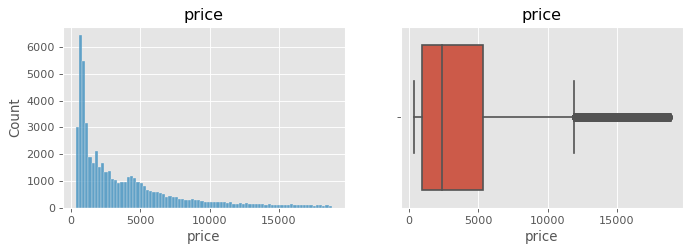

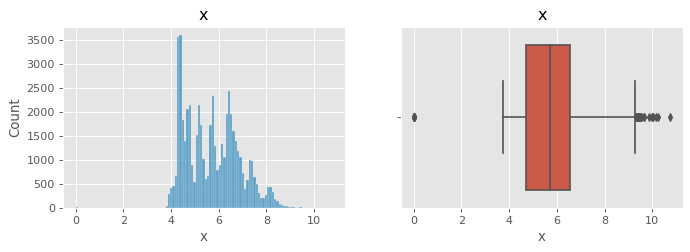

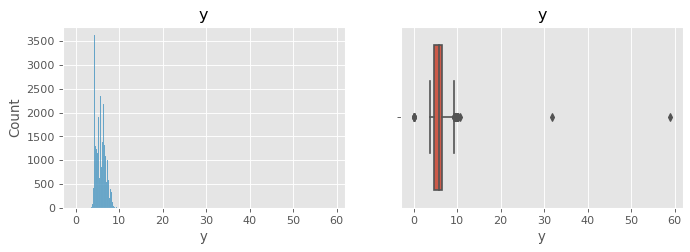

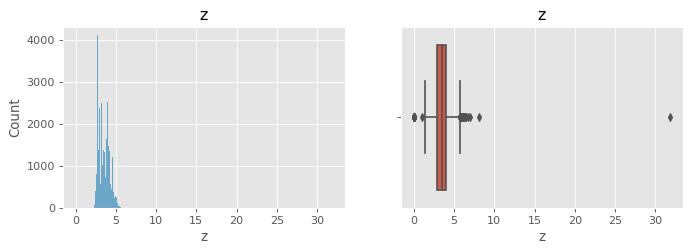

In [8]:
# import libraries for plotting
from string import ascii_letters
import numpy as np
from matplotlib.pyplot import figure
plt.style.use('ggplot')

# plot histograms and box plot of each attribute
import seaborn as sns
for i in range(0,7):
    figure(figsize=(10, 3), dpi=80)
    plt.subplot(1,2,1)
    sns.histplot(x= df_num.iloc[:,i])
    plt.title(df_num.columns[i])
    
    plt.subplot(1,2,2)
    sns.boxplot(x = df_num.iloc[:,i])
    plt.title(df_num.columns[i])
    plt.show()

From the histogram, we can see the carat, table, price, y and z all show right skewed distribution pattern, some of them show also multimodal distribution pattern. It caused by some extreme values, which we will consider dropping. As to the carat and price, it is understandable that most of the diamonds are in a reasonable weight and price rather than extremely large values, which are not facing regular buyers.

Also, it is easy to find that the x, y, and z dimensions of a diamond cannot be 0, neither reach 3cm, which will be irregular. These outliers need to drop.

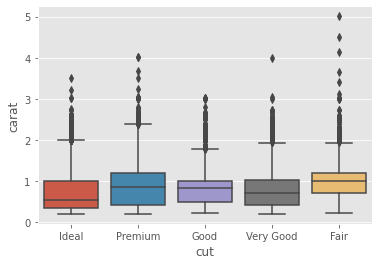

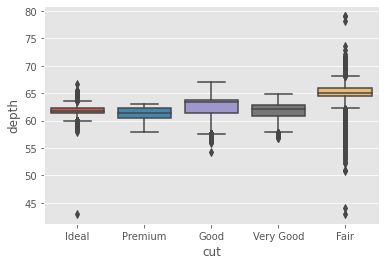

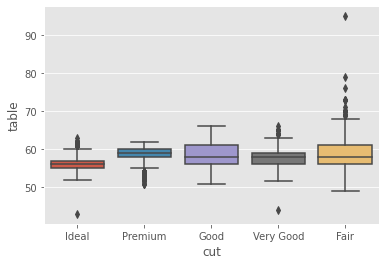

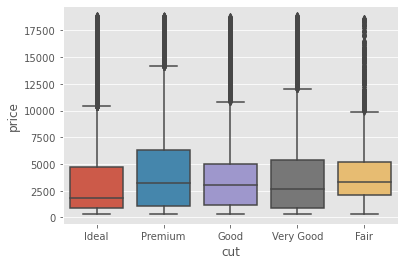

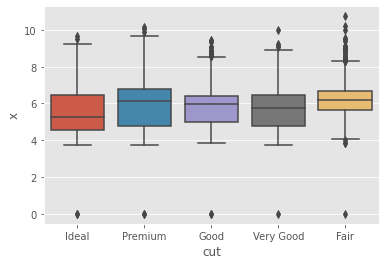

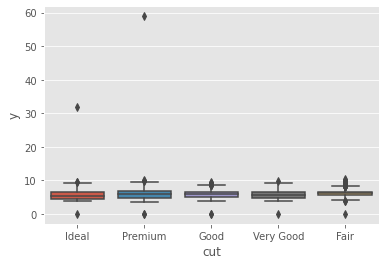

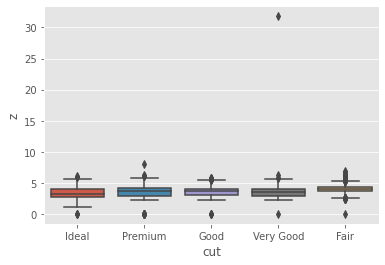

In [9]:
# Boxplot of numeric variables separated by 'cut'
for num in df_num:
    sns.boxplot(x = 'cut', y = num, data = df)
    plt.show()

Ideal cuts have a median price that is slightly lower than other cuts. This doesn't make sense because ideal cuts are the most desirable. This may be because ideal cuts tend to be smaller in carat size, and carat size may lead to the lower price. We will create a price per carat feature in the data preparation section and see if that has an effect on cut. Ideal cuts have slightly lower x y and z values, this may be because these are collinear to carat. Slight variation is seen with the other features as well, with medium quality cuts having slightly higher depth, and ideal cuts having slightly lower table.

#### Categorical Variables

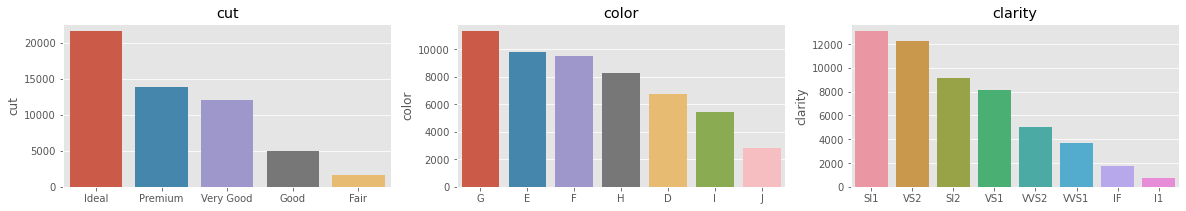

In [10]:
from matplotlib.pyplot import figure

figure(figsize=(20, 3))
for i in range(0,3):
    plt.subplot(1, 3, i+1)
    sns.barplot(x = df_cat.iloc[:,i].value_counts().index, y = df_cat.iloc[:,i].value_counts())
    plt.title(df_cat.columns[i])

The ideal cut category has the most observations, while the fair cut category has the least observations. For the color and clarity, it is also understandable that the medium level categories (G, E for color & SI1, VS2 for clarity)  have the most observations. For the response variable 'cut', ideal cut is more than 10 times larger than fair cut observations.

<AxesSubplot:xlabel='cut'>

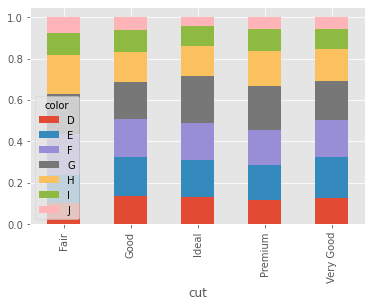

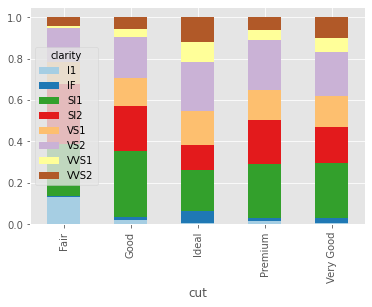

In [11]:
# Crosstab bar plots for categorical variables vs 'cut'
# Percentage crosstab. Ie can see variations between categories more easily.
pd.crosstab(df['cut'], df['color']).apply(lambda r: r/r.sum(), axis=1).plot.bar(stacked = True)
pd.crosstab(df['cut'], df['clarity']).apply(lambda r: r/r.sum(), axis=1).plot.bar(stacked = True, colormap='Paired')

Visually, color seems to have little variation across cuts. However, clarity does seem to have variation across cuts. Ideal cuts have a higher ratio of better clarities. For example, ideal cuts have higher ratios of IF, and a lower percentage of I1 (lowest clarity). Fair cuts have lower ratios of IF, and higher ratios of I1. This implies a correlation between cut and clarity. Better cuts are correlated to better clarities.

#### Null Error Rate

'Ideal' is the most common classification for 'cut'. The null error rate if we predict every response variable to be 'ideal' is 40%.

In [12]:
# Null Error Rate
print(df['cut'].value_counts()[0]/ df['cut'].value_counts().sum())

0.3995365220615499


The null error rate of the response variable is 0.4. We will not consider it as extremely imbalanced. 

## 3. Data Preparation

Removing 'x' 'y' and 'z' with values of 0 because these make no sense. Removing 'x' 'y' and 'z' with values greater than 30 cm, these are extreme outliers identified visually through the EDA. See example below of 'y' > 30, this value is disproportionate to the 'x' and 'z' values.

In [13]:
df[df['y'] > 30]

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12


In [14]:
# Identifying values which make no sense (length, width or height = 0)
# Identify a table value which seems to be an outlier, based of the EDA
out_ind=df.loc[(df['x']==0)|(df['y']==0)|(df['z']==0)|(df['y']>30)|(df['x']>30)|(df['z']>30)|(df['table']>90)].index
df_done=df.drop(out_ind)

In [15]:
df_done.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53916 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53916 non-null  float64
 1   cut      53916 non-null  object 
 2   color    53916 non-null  object 
 3   clarity  53916 non-null  object 
 4   depth    53916 non-null  float64
 5   table    53916 non-null  float64
 6   price    53916 non-null  int64  
 7   x        53916 non-null  float64
 8   y        53916 non-null  float64
 9   z        53916 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


As the categorical variables has degree sequence, we consider they are ordinal. Therefore, the categories will be scaled as ordinal features.

In [16]:
# Assigning numeric ordinality to ordinal 'color' feature
sorted(df_done['color'].unique())
scale_mapper = {'D':6, 'E':5, 'F':4, 'G':3, 'H':2, 'I':1, 'J':0}
df_done['color'] = df_done['color'].replace(scale_mapper)
# Assigning numeric ordinality to ordinal 'clarity' feature
scale_mapper = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
df_done['clarity'] = df_done['clarity'].replace(scale_mapper)

The carat and price could generate a new feature which is price per carat indicating the unit price of a diamond. This feature will be a candidate for feature selection. 

In [17]:
# Creating a price per carat feature to see if this metric has an effect on cut
df_done['Price per Carat'] = df_done['price']/ df_done['carat']
df_done.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Price per Carat
0,0.23,Ideal,5,1,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,5,2,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,5,4,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,1,3,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,0,1,63.3,58.0,335,4.34,4.35,2.75,1080.645161


## 4. Prepped Data Review

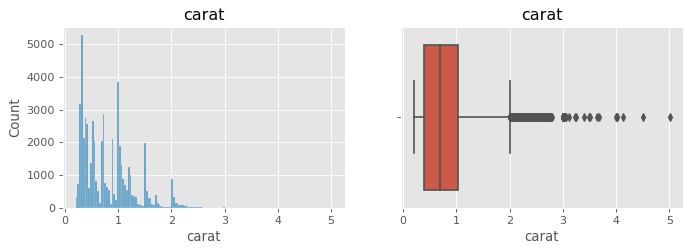

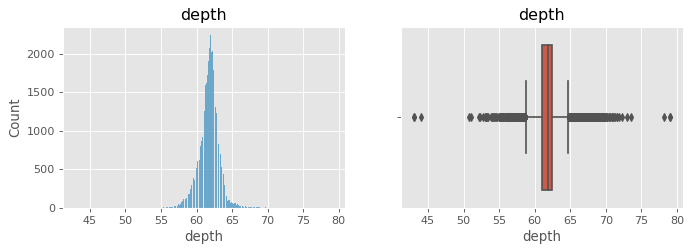

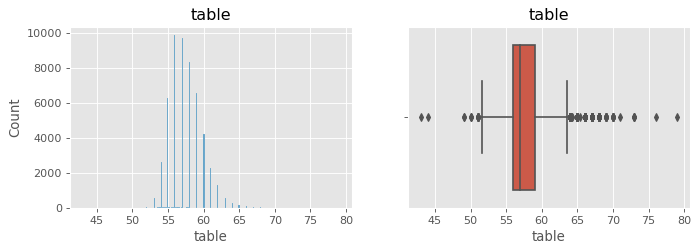

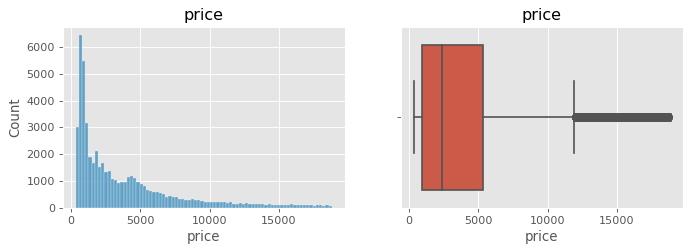

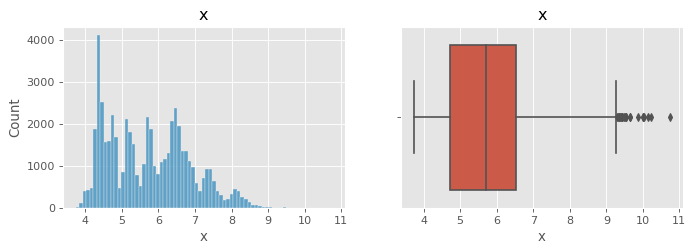

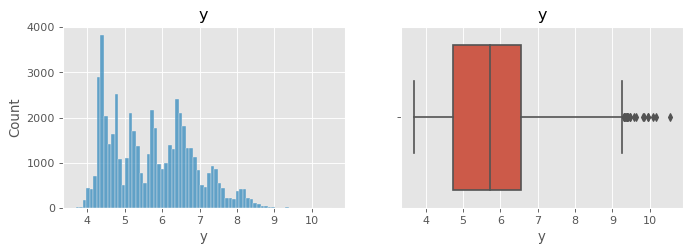

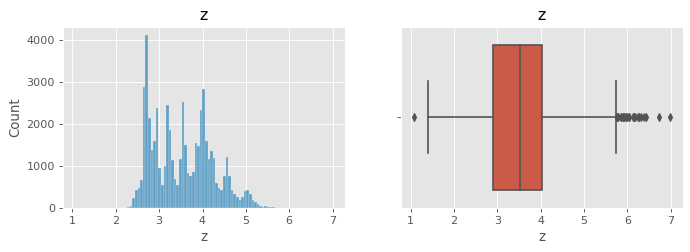

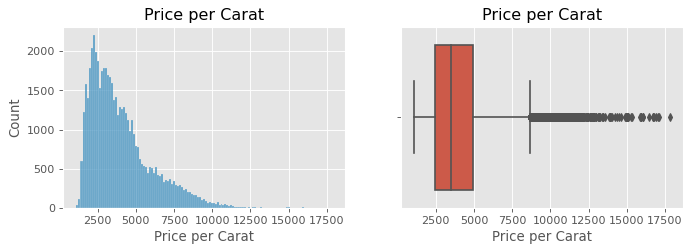

In [18]:
# separate the numeric variables and categorical variables
df_num=df_done[['carat','depth','table','price','x','y','z','Price per Carat']]
df_cat=df_done[['cut','color','clarity']]

# import libraries for plotting
from string import ascii_letters
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('ggplot')

# plot histograms and box plot of each attribute
import seaborn as sns
for i in range(0,8):
    figure(figsize=(10, 3), dpi=80)
    plt.subplot(1,2,1)
    sns.histplot(x= df_num.iloc[:,i])
    plt.title(df_num.columns[i])
    
    plt.subplot(1,2,2)
    sns.boxplot(x = df_num.iloc[:,i])
    plt.title(df_num.columns[i])
    plt.show()

After dropping the outliers, x, y and z show the similar pattern. The removal of the outliers with x y and z are shown in the boxplots and histograms (smaller tails). The price per carat shows a similar pattern with price (right skew).

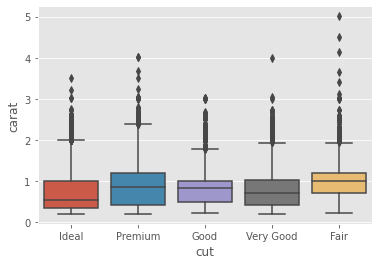

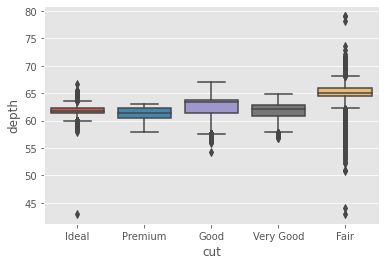

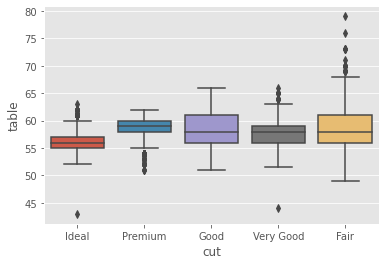

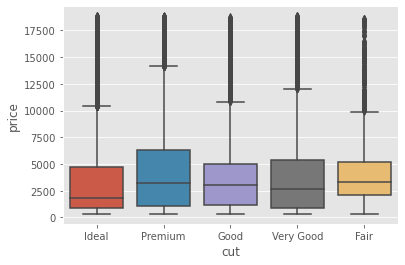

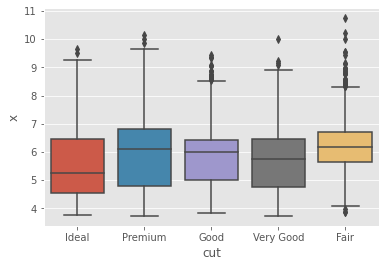

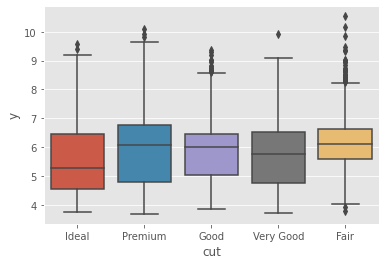

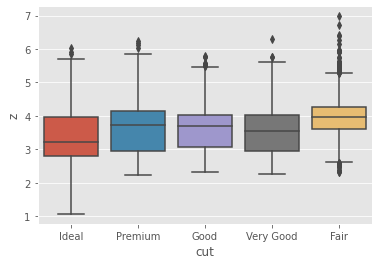

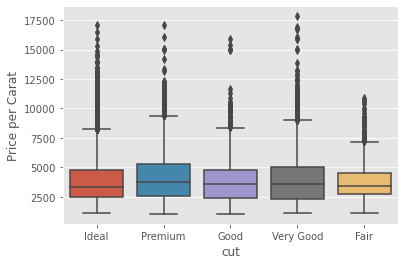

In [19]:
for num in df_num:
    sns.boxplot(x = 'cut', y = num, data = df_done)
    plt.show()

The removal of the outliers with x y and z are shown in the boxplots here as well (smaller whiskers). The distributions of the other variables compared to cut are similar to the pre data preparation EDA. Price per carat seems to have little variation across cuts, showing it to be useless for the machine learning modeling. 

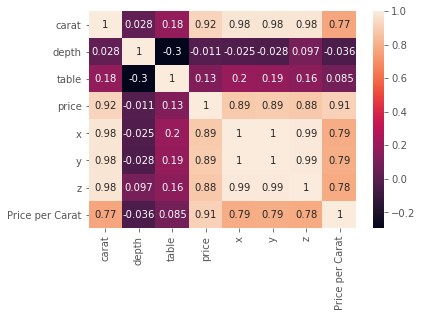

In [20]:
# Heatmap of correlation
sns.heatmap(df_num.corr(), annot=True)
plt.show()

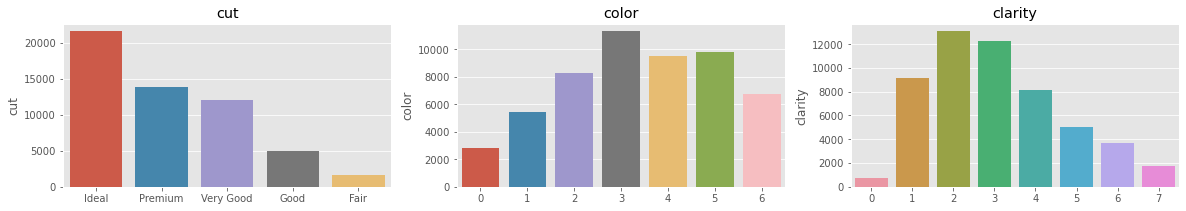

In [21]:
from matplotlib.pyplot import figure

figure(figsize=(20, 3))
for i in range(0,3):
    plt.subplot(1, 3, i+1)
    sns.barplot(x = df_cat.iloc[:,i].value_counts().index, y = df_cat.iloc[:,i].value_counts())
    plt.title(df_cat.columns[i])

There is little changes with the categorical variables after the data preparation.

<AxesSubplot:xlabel='cut'>

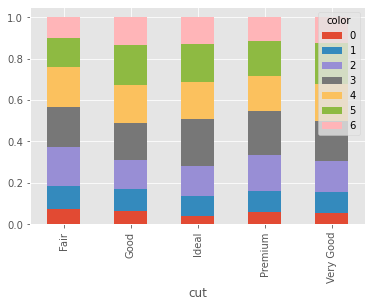

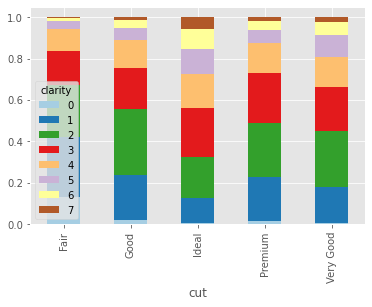

In [22]:
pd.crosstab(df_done['cut'], df_done['color']).apply(lambda r: r/r.sum(), axis=1).plot.bar(stacked = True)
pd.crosstab(df_done['cut'], df_done['clarity']).apply(lambda r: r/r.sum(), axis=1).plot.bar(stacked = True,colormap='Paired')

There is little change with the categorical variables vs. cut after the data preparation. As the data has been cleaned, the more accurate characteristics we might find by conducting the chi-sq test on each categorical variable.

In [23]:
# chi-sq test for categorical variables
from scipy.stats import chi2_contingency
crosstab1=pd.crosstab(df_done['cut'], df_done['color'])
chi2_color, p_color, dof_color, expected_color=chi2_contingency(crosstab1)
print(p_color)

2.394860404663579e-51


In [24]:
# chi-sq test for categorical variables
crosstab2=pd.crosstab(df_done['cut'],df_done['clarity'])
chi2_cla, p_cla, dof_cla, expected_cla=chi2_contingency(crosstab2)
print(p_cla)

0.0


In [45]:
# chi-sq test for categorical variables
crosstab3=pd.crosstab(df_done['color'],df_done['clarity'])
chi2, p, dof, expected=chi2_contingency(crosstab3)
print(p)

0.0


After applying Chi-sq test on the two categorical variables with the response variable, the p-value is smaller than 0.05, which means at least one category in color and clarity shows significant different distribution pattern according to the target classes. The extremely small p value of Chi-sq test on the two explanatory variables shows the two explanatory variables can be seen as independent. 

Based on the prepped data review, we can get some simple conclusion which might be useful for our feature selection.

- 1. Carat, price, x, y, z and price per carat have high correlation coefficient, the final selection result supposed to be kept only one of them to avoid information duplication. As new feature price per carat contains both carat and price information and it is collinear with carat and price, it is the best choice to be selected in and drop other features.
- 2. Two categorical variables (color and clarity) are supposed to be selected.

## 5. Classifier Modeling

Use mutual information classifier to select features. Not including 'x','y','z','carat' and 'price' because they are collinear with 'price per carat'.

In [25]:
'''**********************************
https://towardsdatascience.com/feature-selection-using-python-for-classification-problem-b5f00a1c7028
*************************************'''
# import libraries
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
# define the variables
X = df_done.drop(['cut', 'x', 'y', 'z','carat','price'], axis = 1)
y = df_done['cut']
# split variables
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2)

# apply feature selection
sel_classif = SelectKBest(mutual_info_classif, k=5)
X_train_mutual = sel_classif.fit_transform(X_train, y_train)
print(sel_classif.get_support())

selected_feat_classif= X_train.columns[(sel_classif.get_support())]
print(selected_feat_classif)

[ True  True  True  True  True]
Index(['color', 'clarity', 'depth', 'table', 'Price per Carat'], dtype='object')


Five features, 'color', 'clarity', 'depth', 'table', 'Price per Carat' will be selected for constructing models.

#### 5.1 Decision Tree Model

In [26]:
# set the explanatory variables and response variable
X = df_done[['color', 'clarity', 'depth', 'table', 'Price per Carat']]
y = df_done['cut']
# split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25, stratify=y)

In [39]:
# Decision Tree
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')

# cross validation on the decisiontree classifier
from sklearn.model_selection import cross_val_score

scores_dt_acc = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')
scores_dt_recall = cross_val_score(dt, X_train, y_train, cv=5, scoring='recall_macro')
scores_dt_pre = cross_val_score(dt, X_train, y_train, cv=5, scoring='precision_macro')
scores_dt_f1 = cross_val_score(dt, X_train, y_train, cv=5, scoring='f1_macro')

# print out the evaluation metrics derived from the K-fold cross validation process
print (scores_dt_acc.mean())
print (scores_dt_recall.mean())
print (scores_dt_pre.mean())
print (scores_dt_f1.mean())

0.6497764237262988
0.6498390571120864
0.6514429024286826
0.6499063527626037


#### 5.2 Random Forest Model

In [40]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# cross validation on the randomforest classifier
from sklearn.model_selection import cross_val_score

scores_rfc_acc = cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy')
scores_rfc_recall = cross_val_score(rfc, X_train, y_train, cv=5, scoring='recall_macro')
scores_rfc_pre = cross_val_score(rfc, X_train, y_train, cv=5, scoring='precision_macro')
scores_rfc_f1 = cross_val_score(rfc, X_train, y_train, cv=5, scoring='f1_macro')

# print out the evaluation metrics derived from the K-fold cross validation process
print (scores_rfc_acc.mean())
print (scores_rfc_recall.mean())
print (scores_rfc_pre.mean())
print (scores_rfc_f1.mean())

0.720874577740563
0.7103893652449617
0.7272484602735692
0.7147527807705318


#### 5.3 Gradient Boosting Classifier

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the classifier 
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

# cross validation on the Gradient Boosting classifier
from sklearn.model_selection import cross_val_score

scores_gbc_acc = cross_val_score(gbc, X_train, y_train, cv=5, scoring='accuracy')
scores_gbc_recall = cross_val_score(gbc, X_train, y_train, cv=5, scoring='recall_macro')
scores_gbc_pre = cross_val_score(gbc, X_train, y_train, cv=5, scoring='precision_macro')
scores_gbc_f1 = cross_val_score(gbc, X_train, y_train, cv=5, scoring='f1_macro')

# print out the evaluation metrics derived from the K-fold cross validation process
print (scores_gbc_acc.mean())
print (scores_gbc_recall.mean())
print (scores_gbc_pre.mean())
print (scores_gbc_f1.mean())

0.7036378768870726
0.5521984831061625
0.7240829450135342
0.5669086913048854


#### 5.4 Stochastic Gradient Descent Classifier

In [42]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import SGDClassifier

# instantiate the classifier 
sdg = SGDClassifier(shuffle=True)

# cross validation on the Gradient Boosting classifier
from sklearn.model_selection import cross_val_score

scores_sdg_acc = cross_val_score(sdg, X_train, y_train, cv=5, scoring='accuracy')
scores_sdg_recall = cross_val_score(sdg, X_train, y_train, cv=5, scoring='recall_macro')
scores_sdg_pre = cross_val_score(sdg, X_train, y_train, cv=5, scoring='precision_macro')
scores_sdg_f1 = cross_val_score(sdg, X_train, y_train, cv=5, scoring='f1_macro')

# print out the evaluation metrics derived from the K-fold cross validation process
print (scores_sdg_acc.mean())
print (scores_sdg_recall.mean())
print (scores_sdg_pre.mean())
print (scores_sdg_f1.mean())

0.3294263166990727
0.22642949348666624
0.14857398653588672
0.18108346867142586


#### 5.5 XG Boost Classifier

In [43]:
import warnings
warnings.filterwarnings('ignore')
import xgboost
from xgboost import XGBClassifier

# instantiate the classifier 
xgb = XGBClassifier(eval_metric='mlogloss')

# cross validation on the Extreme Gradient Boosting classifier
from sklearn.model_selection import cross_val_score

scores_xgb_acc = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')
scores_xgb_recall = cross_val_score(xgb, X_train, y_train, cv=5, scoring='recall_macro')
scores_xgb_pre = cross_val_score(xgb, X_train, y_train, cv=5, scoring='precision_macro')
scores_xgb_f1 = cross_val_score(xgb, X_train, y_train, cv=5, scoring='f1_macro')

# print out the evaluation metrics derived from the K-fold cross validation process
print (scores_xgb_acc.mean())
print (scores_xgb_recall.mean())
print (scores_xgb_pre.mean())
print (scores_xgb_f1.mean())

0.7548532972959618
0.735086583424537
0.7735979519878129
0.7419811209661719


## 6. Select Models

Comparing to the score above, we could make the below intuitive table:

| Metric        | Model 5.1 | Model 5.2 | Model 5.3 | Model 5.4 | Model 5.5 |
| ------------- | ------- | ------- | ------- | ------- | ------- |
| Accuracy      | 0.650  | 0.721 | 0.704 | 0.329 | 0.755 |
| Recall      | 0.650  | 0.710 | 0.552 | 0.226 | 0.735 |
| Precision      | 0.651  | 0.727 | 0.724 | 0.149 | 0.774 |
| F1      | 0.650  | 0.715 | 0.567 | 0.181 | 0.742 |

All of the five models were applied with five selected features. Except Stochastic Gradient Descent Classifier model, the other 4 models showed pretty good performances with all metric scores over 0.65. Even though XG Boost Classifier had the best performance, as it is computationally expensive and the Random forest model also has a relatively high performace with less expensive on computational requirment, **Random Forest model** will be selected as the model for predicting the testing set.

In [44]:
# use the training set fit the model
rfc.fit(X_train, y_train)
# get the predicted values of y
y_pred = rfc.predict(X_test)

# check the metrices on the testing set
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred,average='macro'))
print("Recall:", recall_score(y_test, y_pred,average='macro'))
print("f1:", f1_score(y_test, y_pred,average='macro'))

Accuracy: 0.7214926923362267
Precision: 0.7310496106476134
Recall: 0.7082037021382941
f1: 0.7156664278301463


The Random Forest model also has a good performance on the testing set. The accuracy, precision, recall and F1 scores are all over 0.70.

## 7. Conclusions

According to the correlation coefficient, the carat, price, x, y and z variables are highly correlated in the data set. Five explanatory variables could be selected for the diamond prediction models. With the 5 explanatory variables, Random Forest model could predict the hold out testing set of data very well. The accuracy, precision, recall, and F1 scores could reach 0.7.

### References
https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn<br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html<br>
https://www.youtube.com/watch?v=hTsxJqw2zMM<br>
https://www.kaggle.com/danielmarrama/diamond-exploratory-analysis-and-visualizations<br>
https://tomaxent.com/2018/04/27/Micro-and-Macro-average-of-Precision-Recall-and-F-Score/